In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

palette = ['#F5DF4D', '#939597', '#0F4C81', '#FF6F61', '#5F4B8B', '#88B04B', '#92A8D1', '#F7CAC9', '#955251',\
           '#B163A3', '#009473']
palette.reverse()

In [2]:
df = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df['Year'] =  pd.to_datetime(df['Year'], format='%Y')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 30.2+ KB
None


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-01-01,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011-01-01,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-01-01,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-01-01,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-01-01,Non Fiction


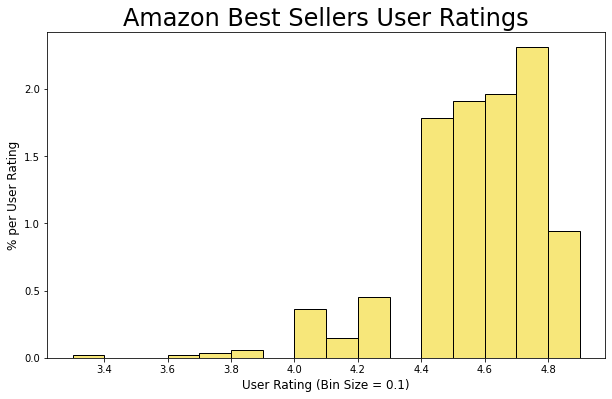

In [6]:
# Set figure size (width, height) in inches
plt.figure(figsize = (10, 6))

# Plot histogram using Seaborn
sns.histplot(df['User Rating'], stat='density', binwidth=0.1, color='#F5DF4D')
  
# Set label for x-axis
plt.xlabel( "User Rating (Bin Size = 0.1)" , size=12)
  
# Set label for y-axis
plt.ylabel( "% per User Rating" , size=12)
  
# Set title for figure
plt.title( "Amazon Best Sellers User Ratings" , size=24);

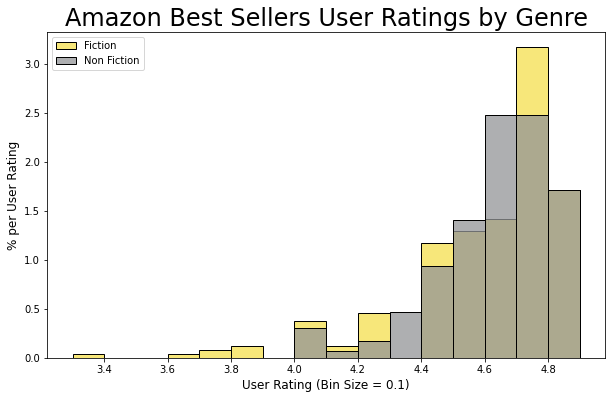

In [7]:
# Set figure size (width, height) in inches
plt.figure(figsize = (10, 6))

# Plot histogram using Seaborn
sns.histplot(df.loc[df['Genre'] == 'Fiction']['User Rating'], stat='density', binwidth=0.1, color='#F5DF4D')
sns.histplot(df.loc[df['Genre'] == 'Non Fiction']['User Rating'], stat='density', binwidth=0.1, color='#939597') 

# Create plot legend
plt.legend(labels=['Fiction', 'Non Fiction'])

# Set label for x-axis
plt.xlabel( "User Rating (Bin Size = 0.1)" , size=12)
  
# Set label for y-axis
plt.ylabel( "% per User Rating" , size=12)
  
# Set title for figure
plt.title( "Amazon Best Sellers User Ratings by Genre" , size=24);

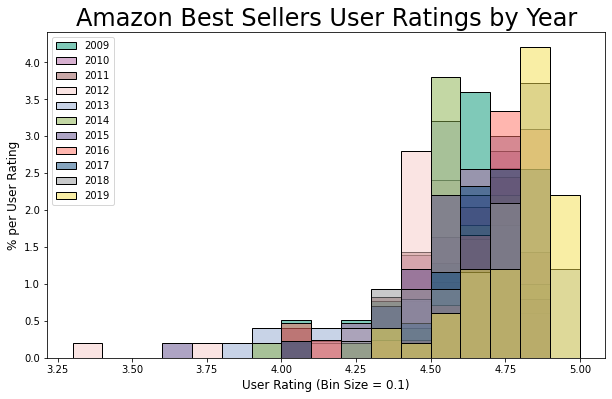

In [8]:
# Set figure size (width, height) in inches
plt.figure(figsize = (10, 6))

years = np.sort(df['Year'].dt.year.unique())
for i, year in enumerate(years):
    # Plot histogram using Seaborn
    sns.histplot(df.loc[df['Year'] == str(year)]['User Rating'], stat='density', binwidth=0.1, color=palette[i], alpha=0.5) 

# Create plot legend
plt.legend(labels=years)

# Set label for x-axis
plt.xlabel( "User Rating (Bin Size = 0.1)" , size=12)
  
# Set label for y-axis
plt.ylabel( "% per User Rating" , size=12)
  
# Set title for figure
plt.title( "Amazon Best Sellers User Ratings by Year" , size=24);

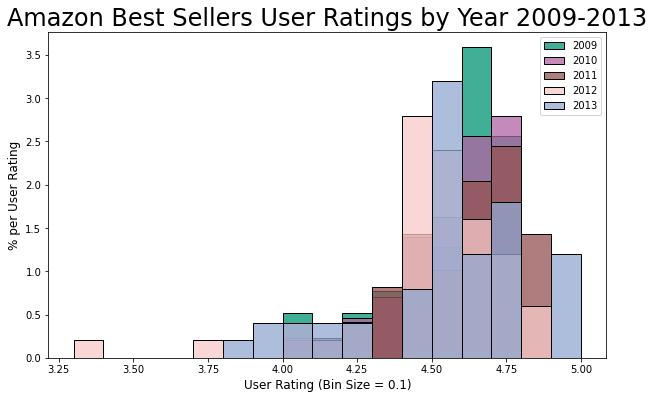

In [9]:
# Set figure size (width, height) in inches
plt.figure(figsize = (10, 6))

years = np.sort(df['Year'].dt.year.unique())
for i, year in enumerate(years):
    # Plot histogram using Seaborn
    if i in range(5):
        sns.histplot(df.loc[df['Year'] == str(year)]['User Rating'], stat='density', binwidth=0.1, color=palette[i]) 

# Create plot legend
plt.legend(labels=years[0:5])

# Set label for x-axis
plt.xlabel( "User Rating (Bin Size = 0.1)" , size=12)
  
# Set label for y-axis
plt.ylabel( "% per User Rating" , size=12)
  
# Set title for figure
plt.title( "Amazon Best Sellers User Ratings by Year 2009-2013" , size=24);

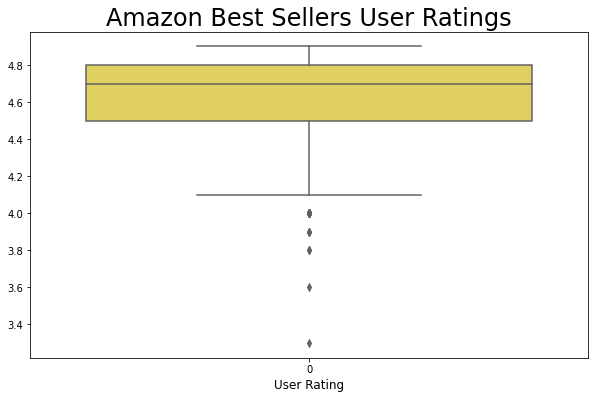

In [10]:
# Set figure size (width, height) in inches
plt.figure(figsize = (10, 6))

# Plot boxplot using Seaborn
sns.boxplot(data=df['User Rating'], color='#F5DF4D')
  
# Set label for x-axis
plt.xlabel( "User Rating" , size=12)

  
# Set title for figure
plt.title( "Amazon Best Sellers User Ratings" , size=24);

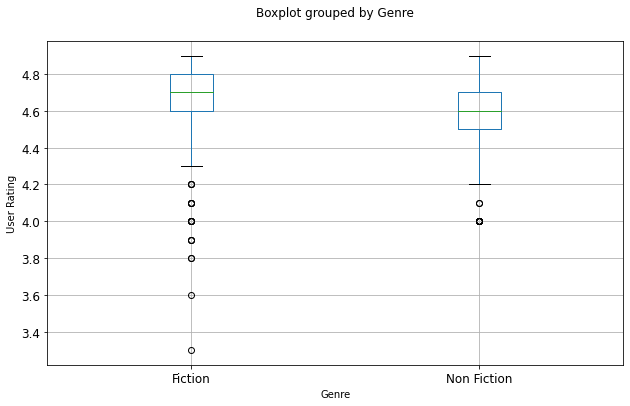

In [11]:
ax = df.boxplot('User Rating', 'Genre', figsize=(10,6), fontsize=12)
ax.set_ylabel('User Rating')
ax.set_title('');

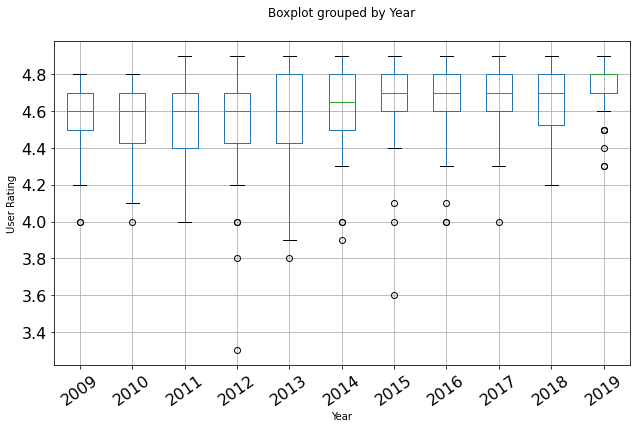

In [12]:
df['Year'] = df['Year'].dt.year
ax = df.boxplot('User Rating', 'Year', figsize=(10,6), fontsize=16, rot=35)
ax.set_ylabel('User Rating')
ax.set_title('');

# IF YOU LIKE THIS SIMPLE VISUALAZATION CODE THEN PLZ COMMENT AND LIKE 